<a href="https://colab.research.google.com/github/chibykelaw/Time-Series-Analysis-and-Forecast---Electricity-Price/blob/main/Time_Series_Analysis_and_Forecasting_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

In [2]:
# Read data

dataset = pd.read_csv('https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv')

In [3]:
dataset["FullDate"] = pd.to_datetime(dataset["FullDate"]) 

In [4]:
dataset.set_index( "FullDate" , inplace= True )

In [5]:
# Daily sampling rate (sum)

dataset = dataset.resample( 'D' ).sum()

In [6]:
dataset.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [7]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dataset['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print( f' {k} : {v} ')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -3.6901589888366457
p-value: 0.004253725504574117
No. of lags used: 30
No. of observations used: 3803
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [8]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dataset['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print( f' {k} : {v} ')

ADF Statistic: -2.90276669716518
p-value: 0.04502721288462542
No. of lags used: 27
No. of observations used: 3806
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [9]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dataset['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
  print( f' {k} : {v} ')

ADF Statistic: -8.269053866873803
p-value: 4.848817773711633e-13
No. of lags used: 20
No. of observations used: 3813
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [11]:
# Reset index

dataset.reset_index(inplace=True)

In [12]:
# Extract FullDate and ElecPrice columns to create univariate dataset

df = dataset[['FullDate', 'ElecPrice']]

In [13]:
df["FullDate"] = pd.to_datetime(df["FullDate"]) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
# Make the Datetime column the index in the df dataset

df.set_index( "FullDate" , inplace= True )

In [15]:
df.head()

,ElecPrice
FullDate,
2010-09-01,2751.700
2010-09-02,570.810
2010-09-03,504.975
2010-09-04,502.275
2010-09-05,500.555


Text(0, 0.5, 'ElecPrice')

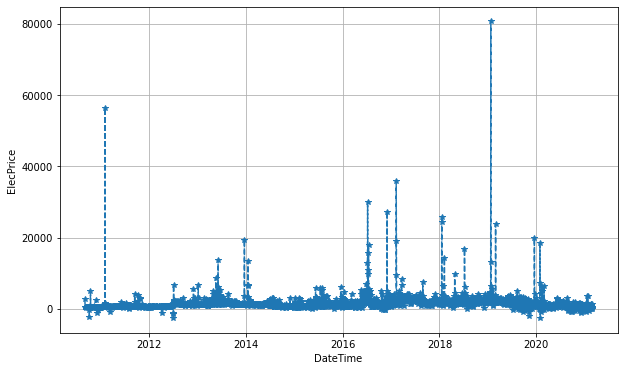

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*')
plt.grid()
plt.xlabel('DateTime')
plt.ylabel('ElecPrice')

In [17]:
# reset df index

df.reset_index(inplace=True)

In [18]:
df.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [19]:
df = df.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [22]:
df.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [21]:
# Split df (univariate dataset) into train and test set

train = df[:2757]
test = df[2757:]

In [23]:
train.describe()

,y
count,2757.000000
mean,1495.508190
std,2009.362392
min,-2491.320000
25%,751.815000
50%,1152.225000
75%,1722.235000
max,56324.760000


In [24]:
test.describe()

,y
count,1077.000000
mean,1793.301286
std,2877.639200
min,-2538.025000
25%,984.415000
50%,1584.160000
75%,2288.280000
max,80606.400000


In [25]:
# Train the model

model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
#predict for the next 7 days

future = model.make_future_dataframe(periods= 7 , freq= 'D' )

In [41]:
forecast1 = model.predict(test)
forecast1.head()
forecast1[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2536.337494,167.874984,5137.571216,2691.764386,2691.764386,2691.764386
1,2018-03-21,2689.655459,435.392707,5343.087901,2692.580955,2692.580955,2692.580955
2,2018-03-22,2788.705741,402.468651,5078.470757,2693.397524,2693.397524,2693.397524
3,2018-03-23,2580.977221,22.288791,4877.709062,2694.214093,2694.214093,2694.214093
4,2018-03-24,2256.367941,-193.170501,4401.748803,2695.030663,2695.030663,2695.030663
...,...,...,...,...,...,...,...
1072,2021-02-24,3475.863766,693.587751,6362.128992,3567.126543,1842.184677,5284.593210
1073,2021-02-25,3542.743730,611.746638,6523.029543,3567.943112,1840.043218,5287.908854
1074,2021-02-26,3309.660718,347.645798,6267.406253,3568.759681,1839.279504,5291.224499
1075,2021-02-27,2966.465610,21.686054,6107.670974,3569.576250,1838.653833,5294.540143


In [27]:
forecast = model.predict(future)
forecast.head()
forecast[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,996.028134,-1459.836537,3503.837731,851.777631,851.777631,851.777631
1,2010-09-02,1076.181083,-1396.151606,3524.098776,851.727173,851.727173,851.727173
2,2010-09-03,851.092206,-1606.220038,3406.952405,851.676716,851.676716,851.676716
3,2010-09-04,510.753732,-1881.073340,2971.295579,851.626258,851.626258,851.626258
4,2010-09-05,420.690845,-1747.392761,2775.042911,851.575800,851.575800,851.575800
...,...,...,...,...,...,...,...
2759,2018-03-22,2788.705741,423.141466,5057.117471,2693.397524,2693.397524,2693.397524
2760,2018-03-23,2580.977221,199.797503,5120.547738,2694.214093,2694.214093,2694.214093
2761,2018-03-24,2256.367941,-247.426744,4605.458644,2695.030663,2695.030663,2695.030663
2762,2018-03-25,2180.405115,-137.147184,4635.076931,2695.847232,2695.847232,2695.847232


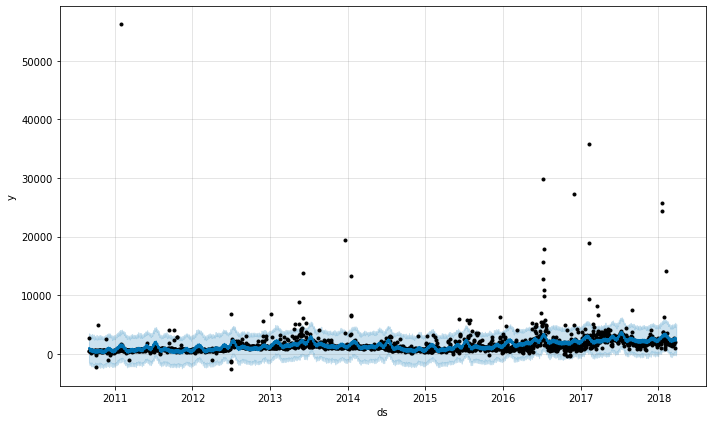

In [28]:
model.plot(forecast)
plt.show()

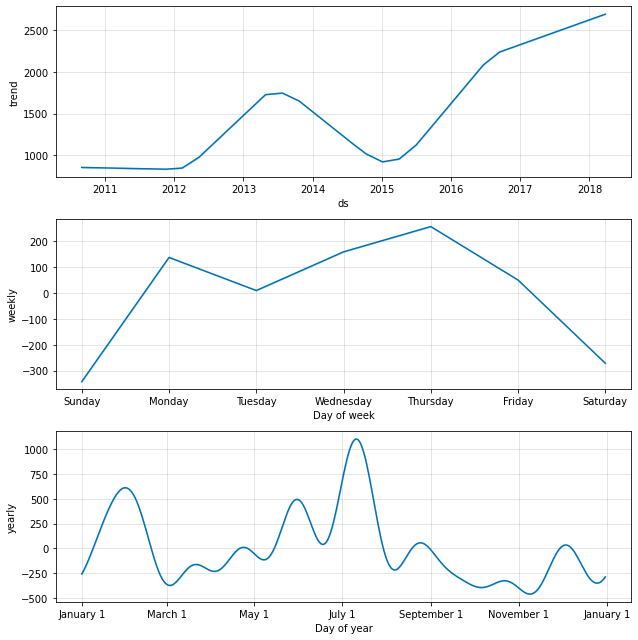

In [29]:
figures = model.plot_components(forecast)

In [35]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [43]:
# Initial training period.
initial= 4*365
initial= str(initial)+'days'

#Period length that we perform the cross validation for.
period= 4*365
period=str(period)+'days'

#Horizon of prediction essentially for each fold.
horizon = 365
horizon=str(horizon)+'days'

fb_cv=cross_validation(model,initial=initial,period=period,
horizon=horizon)

# Performance Metrics of fb_cv
performance_metrics(fb_cv)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-03-19 00:00:00 and 2017-03-19 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,1.907725e+06,1381.204107,834.770063,0.239079,0.200045,0.944444
1,37 days,1.045022e+06,1022.262999,698.531337,0.229701,0.200045,0.972222
2,38 days,5.621778e+05,749.785173,600.291887,0.220717,0.200045,1.000000
3,39 days,5.794525e+05,761.217773,609.740418,0.217269,0.200045,1.000000
4,40 days,6.026518e+05,776.306509,631.179952,0.222598,0.205438,1.000000
...,...,...,...,...,...,...,...
325,361 days,2.447365e+06,1564.405751,1505.841694,0.790355,0.743552,1.000000
326,362 days,2.465043e+06,1570.045600,1514.477328,0.797801,0.743552,1.000000
327,363 days,2.519196e+06,1587.197627,1541.964256,0.817953,0.758688,1.000000
328,364 days,2.571540e+06,1603.602148,1556.661298,0.851859,0.797969,1.000000


In [38]:
df_cv=cross_validation(model, horizon)

# Performance Metrics of fb_cv
performance_metrics(df_cv)

INFO:fbprophet:Making 8 forecasts with cutoffs between 2013-09-18 12:00:00 and 2017-03-19 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days 12:00:00,5.501623e+05,741.729286,481.704582,1.631634,0.277144,0.986301
1,37 days 00:00:00,5.526025e+05,743.372375,483.330759,1.634388,0.277144,0.986301
2,37 days 12:00:00,4.552093e+05,674.692015,472.439335,1.639652,0.283600,0.989726
3,38 days 00:00:00,4.653758e+05,682.184544,478.019225,1.641679,0.291376,0.989726
4,38 days 12:00:00,4.180341e+05,646.555530,473.815841,1.666555,0.295269,0.993151
...,...,...,...,...,...,...,...
653,363 days 00:00:00,2.930369e+06,1711.831946,1182.034949,0.819954,0.691467,0.945205
654,363 days 12:00:00,1.960250e+06,1400.089417,1133.524371,0.822330,0.691467,0.945205
655,364 days 00:00:00,1.966150e+06,1402.194697,1135.817573,0.829105,0.699522,0.945205
656,364 days 12:00:00,1.782873e+06,1335.242566,1116.064908,0.830918,0.705950,0.948630
